Successfully loaded /Colorado_pbp.csv

### Dataset Overview ###
Dataset Shape: (10858, 34)

First 5 rows of the dataset:
     game_id        date      home    away  play_id  half time_remaining_half  secs_remaining  secs_remaining_absolute                                        description action_team  home_score  away_score  score_diff  play_length  scoring_play   foul  win_prob  naive_win_prob  home_time_out_remaining  away_time_out_remaining  home_favored_by  total_line                                referees arena_location             arena  attendance shot_team shot_outcome           shooter three_pt free_throw possession_before possession_after
0  401587141  2023-11-06  Colorado  Towson        1     1               19:42            2382                     2382  KJ Simpson made Layup. Assisted by J'Vonne Had...        home           2           0           2            0          True  False  0.924152        0.544405                        6                        6             1

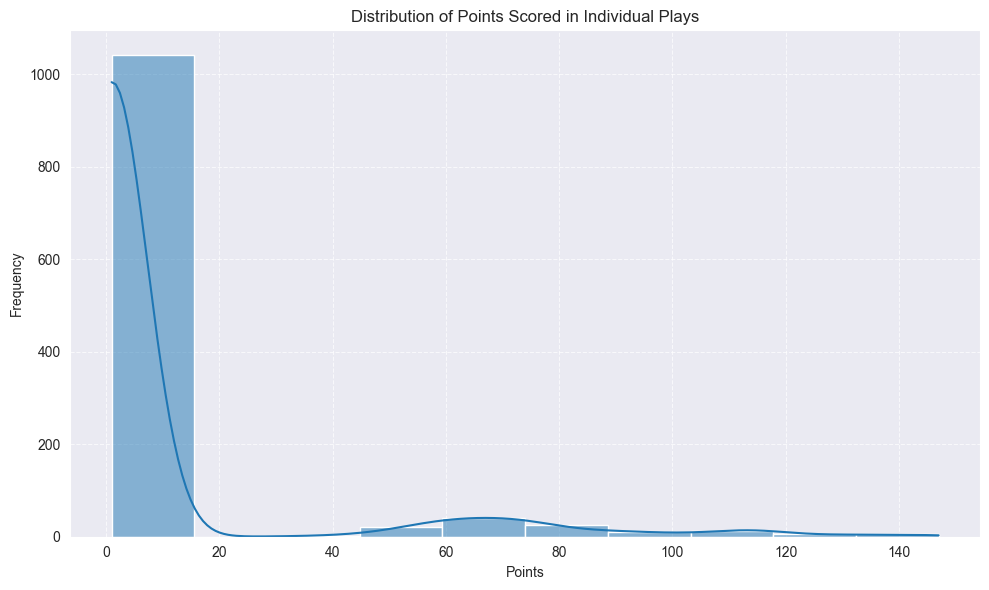

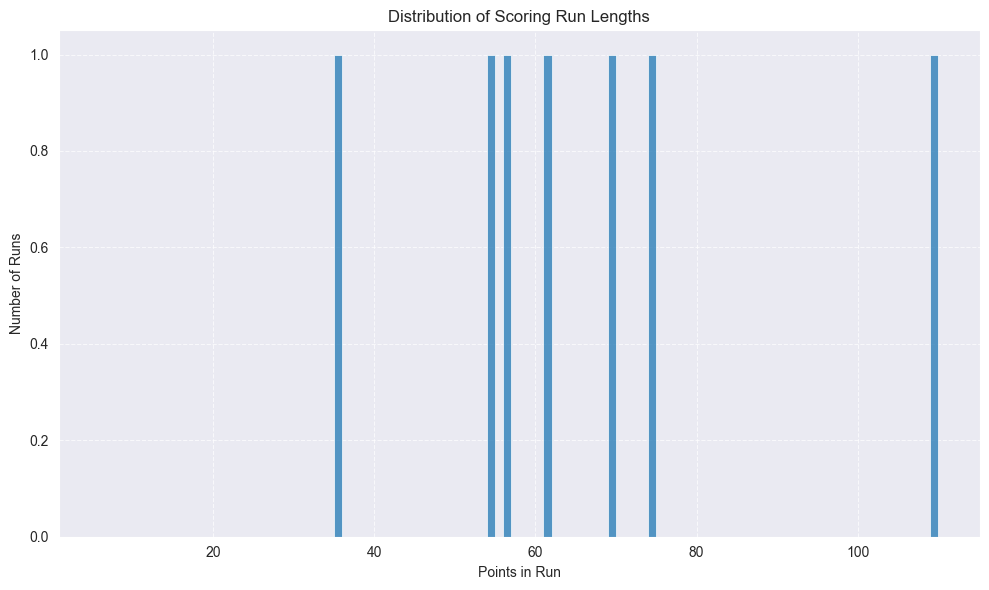

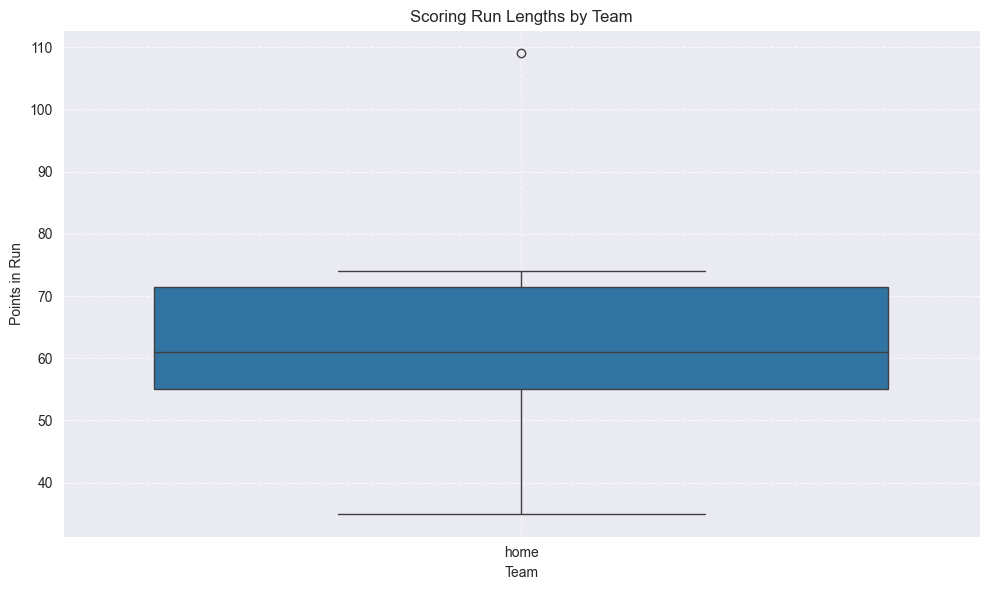


### Feature Engineering for ML Model ###
Created 29 features for the model:
['game_id', 'play_id', 'half', 'secs_remaining', 'secs_remaining_absolute', 'home_score', 'away_score', 'score_diff', 'play_length', 'win_prob', 'naive_win_prob', 'home_time_out_remaining', 'away_time_out_remaining', 'home_favored_by', 'total_line', 'attendance', 'home_points', 'away_points', 'points_scored', 'points_last_3', 'points_last_5', 'scoring_plays_last_3', 'scoring_plays_last_5', 'time_seconds', 'game_progress', 'abs_score_diff', 'close_game', 'blowout', 'team_streak']

Feature matrix shape: (10858, 29)
Target vector shape: (10858,)
Positive class distribution: 1.18% of plays are in scoring runs

### Machine Learning Model ###
Training set: 8143 samples
Test set: 2715 samples

Training Random Forest classifier...

Model Accuracy: 0.9989

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2676
           1       1.00      0.92

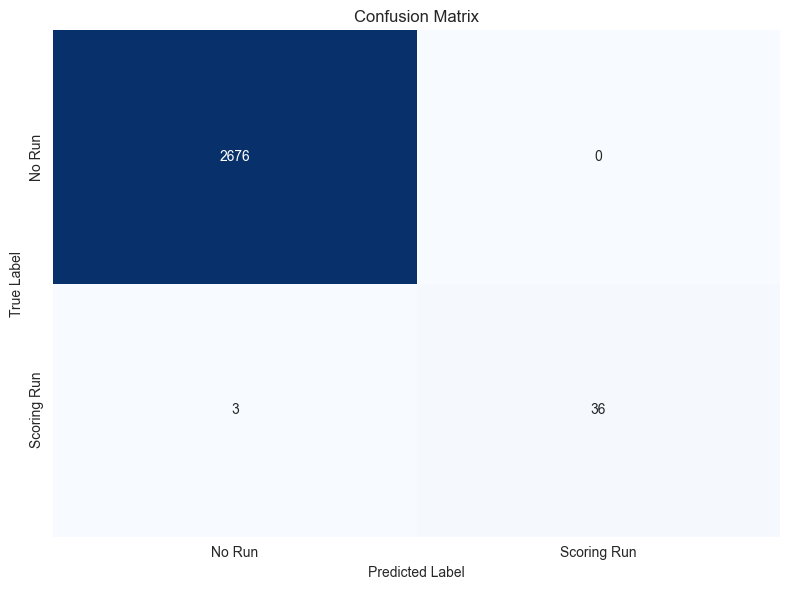


Feature Importance:
                 Feature  Importance
18         points_scored    0.278130
16           home_points    0.161650
17           away_points    0.134174
20         points_last_5    0.121966
23          time_seconds    0.073699
28           team_streak    0.043213
21  scoring_plays_last_3    0.041593
19         points_last_3    0.040542
24         game_progress    0.036041
22  scoring_plays_last_5    0.014042


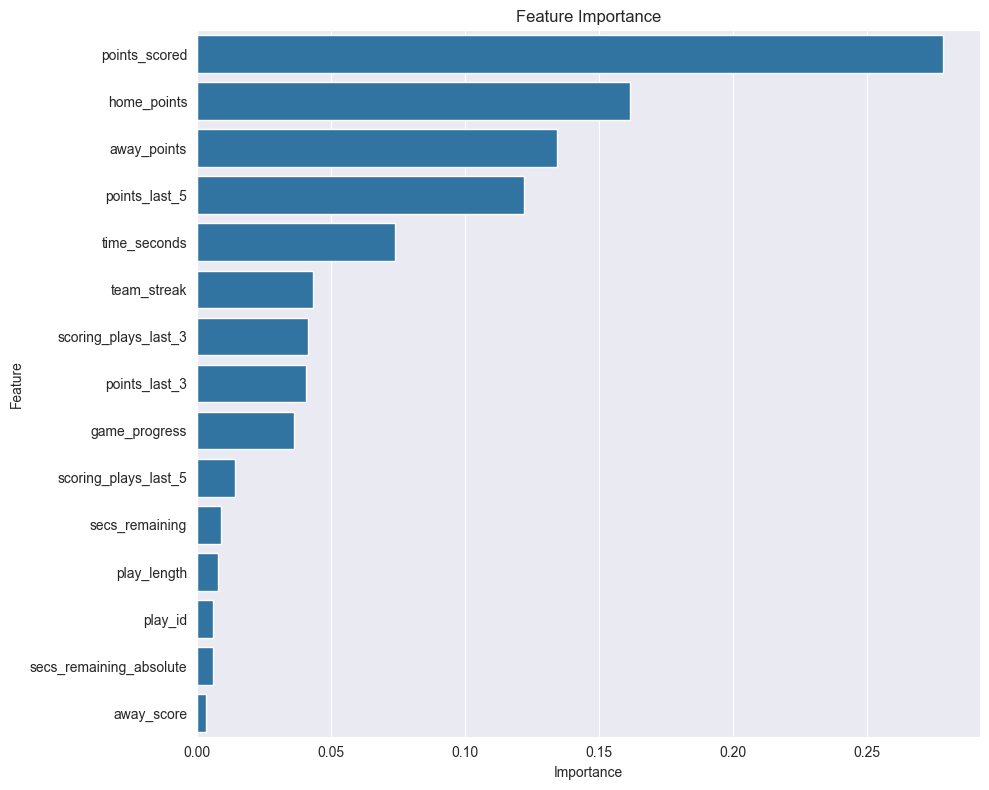


### Saving Results ###
Saved processed data with scoring run information to colorado_basketball_scoring_runs.csv
Saved data for plays in scoring runs to colorado_basketball_scoring_runs_only.csv

### Conclusion ###
This notebook has processed basketball play-by-play data to:
1. Identify scoring runs of 6 or more consecutive points
2. Create features for predicting plays that are part of scoring runs
3. Train and evaluate a machine learning model to predict scoring runs

Next steps could include:
- Refining the scoring run identification based on domain knowledge
- Creating additional features to improve model performance
- Applying the model to new games to predict when scoring runs are likely to occur
- Analyzing factors that lead to or end scoring runs


In [4]:
import kagglehub
# Basketball Scoring Runs Analysis - ML Project

## Initial Setup and Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

## Data Loading
# Load the Colorado play-by-play data
# Replace with the actual path to your dataset
path = kagglehub.dataset_download("robbypeery/college-basketball-pbp-23-24")
# csv = '/ALLTourneyPBP2324.csv'
csv = '/Colorado_pbp.csv'
try:
    df = pd.read_csv(path + csv)
    print(f"Successfully loaded {csv}")
except Exception as e:
    print(f"Error loading the file: {e}")
    # If you're running this in Google Colab and have uploaded the file there
    # from google.colab import files
    # uploaded = files.upload()
    # df = pd.read_csv(next(iter(uploaded)))

## Exploratory Data Analysis
print("\n### Dataset Overview ###")
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nColumn Names:")
print(df.columns.tolist())
print("\nData Types and Non-Null Values:")
print(df.info())
print("\nStatistical Summary of Numeric Columns:")
print(df.describe())

## Checking for Missing Values
print("\n### Missing Values Analysis ###")
missing_values = df.isnull().sum()
print("Missing Values by Column:")
print(missing_values[missing_values > 0])  # Only show columns with missing values

## Understanding the Structure of Play-by-Play Data
print("\n### Understanding Data Structure ###")

# Examining the most important columns for our analysis
# This will vary based on the exact structure of your dataset
# Common basketball play-by-play data typically includes:
# - Game ID or information
# - Time/period information
# - Team information (home/away)
# - Play description
# - Score information

# Let's try to identify key columns
important_columns = ['game_id', 'period', 'time_remaining_period', 'score', 'description', 'home_score', 'away_score']
# Adjust the column names based on what's actually in your dataset
existing_columns = [col for col in important_columns if col in df.columns]

if existing_columns:
    print(f"\nSample data for key columns: {existing_columns}")
    print(df[existing_columns].head(10))
else:
    print("\nCouldn't find expected columns. Here are all columns:")
    print(df.columns.tolist())
    print("\nPlease adjust the code to match your actual column names.")

## Data Preprocessing
print("\n### Data Preprocessing ###")

# We'll need to create some derived columns to help identify scoring runs
# The exact implementation depends on the structure of your dataset
# For now, we'll create a placeholder preprocessing function

def preprocess_basketball_pbp(df):
    """
    Preprocess the basketball play-by-play data to prepare for scoring run analysis.

    Args:
        df: The raw play-by-play dataframe

    Returns:
        Preprocessed dataframe with additional columns for analysis
    """
    processed_df = df.copy()

    # Try to detect column names for score information
    score_columns = [col for col in df.columns if 'score' in col.lower()]
    score_diff_columns = [col for col in df.columns if ('score_diff' in col.lower()) or ('score_margin' in col.lower())]

    print(f"Detected score columns: {score_columns}")
    print(f"Detected score difference columns: {score_diff_columns}")

    # If we have home and away scores, create a score difference column
    if 'home_score' in df.columns and 'away_score' in df.columns:
        processed_df['score_diff'] = processed_df['home_score'] - processed_df['away_score']
    elif not score_diff_columns and len(score_columns) >= 2:
        # If we have at least two score columns but no diff column, create one
        # This is just a guess and would need to be adjusted based on actual column names
        score_cols = score_columns[:2]
        processed_df['score_diff'] = processed_df[score_cols[0]] - processed_df[score_cols[1]]
        print(f"Created score_diff from {score_cols[0]} - {score_cols[1]}")

    # Create a column for points scored in each play
    # This is critical for identifying scoring runs
    # The implementation depends on how scores are recorded in your dataset

    # Method 1: If there are columns indicating points scored directly
    points_columns = [col for col in df.columns if 'point' in col.lower() and 'score' not in col.lower()]
    if points_columns:
        print(f"Found potential points columns: {points_columns}")
        # You might need to adapt this based on your specific column names

    # Method 2: Calculate points scored from score changes
    # This requires sorting by game and time
    game_id_columns = [col for col in df.columns if 'game' in col.lower() and 'id' in col.lower()]
    time_columns = [col for col in df.columns if 'time' in col.lower() or 'clock' in col.lower()]
    period_columns = [col for col in df.columns if 'period' in col.lower() or 'half' in col.lower() or 'quarter' in col.lower()]

    if game_id_columns and (time_columns or period_columns) and score_columns:
        game_col = game_id_columns[0]

        # Determine how to sort by time
        if period_columns and time_columns:
            # If we have both period and time information
            period_col = period_columns[0]
            time_col = time_columns[0]
            print(f"Will sort by {game_col}, {period_col}, {time_col}")

            # Make sure to sort in the correct order (ascending/descending)
            # depending on how time is recorded in your dataset
            processed_df = processed_df.sort_values(by=[game_col, period_col, time_col])
        elif time_columns:
            time_col = time_columns[0]
            print(f"Will sort by {game_col}, {time_col}")
            processed_df = processed_df.sort_values(by=[game_col, time_col])

        # Now calculate score changes
        if 'home_score' in score_columns and 'away_score' in score_columns:
            processed_df['home_points'] = processed_df.groupby(game_col)['home_score'].diff().fillna(0)
            processed_df['away_points'] = processed_df.groupby(game_col)['away_score'].diff().fillna(0)
            processed_df['points_scored'] = processed_df['home_points'] + processed_df['away_points']
            processed_df['scoring_team'] = np.where(processed_df['home_points'] > 0, 'home',
                                                np.where(processed_df['away_points'] > 0, 'away', 'none'))
        elif score_diff_columns:
            score_diff_col = score_diff_columns[0]
            processed_df['score_change'] = processed_df.groupby(game_col)[score_diff_col].diff().fillna(0)
            # Note: This simplification assumes that positive score changes are for one team
            # and negative for the other. You'll need to adjust based on how score_diff is defined.
            processed_df['points_scored'] = processed_df['score_change'].abs()
            processed_df['scoring_team'] = np.where(processed_df['score_change'] > 0, 'team1',
                                                np.where(processed_df['score_change'] < 0, 'team2', 'none'))

    return processed_df

# Apply preprocessing
try:
    processed_df = preprocess_basketball_pbp(df)
    print("\nPreprocessing complete. Here's a sample of the processed data:")
    if 'points_scored' in processed_df.columns:
        print(processed_df[['points_scored', 'scoring_team'] + existing_columns].head(10))
    else:
        print("Couldn't create points_scored column. Please adjust the preprocessing based on your dataset structure.")
        print(processed_df.head(10))
except Exception as e:
    print(f"Error during preprocessing: {e}")
    processed_df = df.copy()

## Feature Engineering - Identifying Scoring Runs
print("\n### Identifying Scoring Runs ###")

def identify_scoring_runs(df, points_col='points_scored', team_col='scoring_team',
                         game_id_col=None, min_run=6):
    """
    Identifies consecutive scoring runs of specified minimum points

    Args:
        df: Preprocessed dataframe with points scored information
        points_col: Column name containing points scored in each play
        team_col: Column name indicating which team scored
        game_id_col: Column name to group events by game
        min_run: Minimum consecutive points to be considered a run (default 6)

    Returns:
        DataFrame with new columns 'run_id', 'in_scoring_run', 'run_points'
    """
    if points_col not in df.columns:
        print(f"Column '{points_col}' not found. Available columns: {df.columns.tolist()}")
        return df

    result_df = df.copy()
    result_df['run_id'] = 0
    result_df['in_scoring_run'] = 0
    result_df['run_points'] = 0

    # Function to process each game separately
    def process_game(game_data):
        current_run_id = 0
        current_run_team = None
        current_run_points = 0
        current_run_indices = []

        for idx, row in game_data.iterrows():
            points = row[points_col]
            team = row[team_col] if team_col in row else None

            # Skip non-scoring plays
            if points <= 0 or pd.isna(points):
                # If we were in a run that meets our criteria, mark all plays in that run
                if current_run_points >= min_run:
                    current_run_id += 1
                    game_data.loc[current_run_indices, 'run_id'] = current_run_id
                    game_data.loc[current_run_indices, 'in_scoring_run'] = 1
                    game_data.loc[current_run_indices, 'run_points'] = current_run_points

                # Reset run tracking
                current_run_team = None
                current_run_points = 0
                current_run_indices = []
                continue

            # Check if same team is scoring or if we don't care about teams
            if team_col is None or current_run_team is None or team == current_run_team:
                # Add to current run
                if current_run_team is None:
                    current_run_team = team

                current_run_points += points
                current_run_indices.append(idx)
            else:
                # Different team scored, check if previous run meets criteria
                if current_run_points >= min_run:
                    current_run_id += 1
                    game_data.loc[current_run_indices, 'run_id'] = current_run_id
                    game_data.loc[current_run_indices, 'in_scoring_run'] = 1
                    game_data.loc[current_run_indices, 'run_points'] = current_run_points

                # Start new run
                current_run_team = team
                current_run_points = points
                current_run_indices = [idx]

        # Check for a run at the end of the game
        if current_run_points >= min_run:
            current_run_id += 1
            game_data.loc[current_run_indices, 'run_id'] = current_run_id
            game_data.loc[current_run_indices, 'in_scoring_run'] = 1
            game_data.loc[current_run_indices, 'run_points'] = current_run_points

        return game_data

    # Process by game if game_id_col is provided, otherwise process everything together
    if game_id_col and game_id_col in df.columns:
        print(f"Processing by game using column '{game_id_col}'")
        for game_id, game_data in result_df.groupby(game_id_col):
            game_processed = process_game(game_data)
            result_df.loc[game_data.index] = game_processed
    else:
        print("Processing entire dataset as one sequence")
        result_df = process_game(result_df)

    # Summarize results
    runs_found = result_df['run_id'].nunique() - 1  # Subtract 1 for run_id=0 (no run)
    print(f"Found {runs_found} scoring runs of {min_run}+ points")
    if runs_found > 0:
        print("\nDistribution of scoring run lengths:")
        run_lengths = result_df[result_df['run_id'] > 0].groupby('run_id')['run_points'].first()
        print(run_lengths.value_counts().sort_index())

    return result_df

# Apply the scoring run identification
try:
    # Determine the best columns to use
    game_id_col = next((col for col in df.columns if 'game' in col.lower() and 'id' in col.lower()), None)

    if 'points_scored' in processed_df.columns:
        runs_df = identify_scoring_runs(processed_df,
                                       points_col='points_scored',
                                       team_col='scoring_team',
                                       game_id_col=game_id_col,
                                       min_run=6)

        print("\nSample of identified scoring runs:")
        if runs_df['in_scoring_run'].sum() > 0:
            print(runs_df[runs_df['in_scoring_run'] == 1].head(10))
        else:
            print("No scoring runs identified with current parameters.")
    else:
        print("Couldn't find points_scored column. Scoring run identification skipped.")
        runs_df = processed_df
except Exception as e:
    print(f"Error during scoring run identification: {e}")
    runs_df = processed_df

## Data Visualization
print("\n### Data Visualization ###")

# Visualizing points distribution
if 'points_scored' in runs_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(runs_df[runs_df['points_scored'] > 0]['points_scored'], bins=10, kde=True)
    plt.title('Distribution of Points Scored in Individual Plays')
    plt.xlabel('Points')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Visualizing scoring runs
if 'in_scoring_run' in runs_df.columns and 'run_points' in runs_df.columns:
    # Plot distribution of run lengths
    run_summary = runs_df[runs_df['run_id'] > 0].groupby('run_id')['run_points'].first()

    if not run_summary.empty:
        plt.figure(figsize=(10, 6))
        sns.histplot(run_summary, bins=range(6, int(run_summary.max()) + 2), kde=False)
        plt.title('Distribution of Scoring Run Lengths')
        plt.xlabel('Points in Run')
        plt.ylabel('Number of Runs')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    # Plot runs by team if team information is available
    if 'scoring_team' in runs_df.columns:
        run_by_team = runs_df[runs_df['run_id'] > 0].groupby(['run_id', 'scoring_team'])['run_points'].first().reset_index()

        if not run_by_team.empty:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x='scoring_team', y='run_points', data=run_by_team)
            plt.title('Scoring Run Lengths by Team')
            plt.xlabel('Team')
            plt.ylabel('Points in Run')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()

## Feature Engineering for ML Model
print("\n### Feature Engineering for ML Model ###")

def create_features_for_scoring_run_prediction(df):
    """
    Create features for predicting whether a play is part of a scoring run.

    Args:
        df: DataFrame with scoring run information

    Returns:
        X: Feature matrix
        y: Target vector (1 if in scoring run, 0 otherwise)
    """
    # Copy to avoid modifying the original
    feature_df = df.copy()

    # Make sure we have the target column
    if 'in_scoring_run' not in feature_df.columns:
        print("Error: 'in_scoring_run' column not found. Cannot proceed with ML.")
        return None, None

    # Define the target
    y = feature_df['in_scoring_run']

    # Create features
    # These will depend heavily on the columns available in your dataset
    # We'll create some example features that might be useful

    # 1. Recent scoring trend (if we have time-ordered data)
    if 'points_scored' in feature_df.columns:
        # Rolling sum of points in last N plays
        feature_df['points_last_3'] = feature_df['points_scored'].rolling(window=3, min_periods=1).sum()
        feature_df['points_last_5'] = feature_df['points_scored'].rolling(window=5, min_periods=1).sum()

        # Number of scoring plays in last N plays
        feature_df['scoring_plays_last_3'] = (feature_df['points_scored'] > 0).rolling(window=3, min_periods=1).sum()
        feature_df['scoring_plays_last_5'] = (feature_df['points_scored'] > 0).rolling(window=5, min_periods=1).sum()

    # 2. Game situation features
    time_columns = [col for col in feature_df.columns if 'time' in col.lower() or 'clock' in col.lower()]
    period_columns = [col for col in feature_df.columns if 'period' in col.lower() or 'half' in col.lower()]

    if time_columns and period_columns:
        time_col = time_columns[0]
        period_col = period_columns[0]

        # Normalize time to fraction of game elapsed if we can
        try:
            # This would need to be adjusted based on your specific time format
            # For example, if time is in MM:SS format, convert to seconds
            if ':' in str(feature_df[time_col].iloc[0]):
                feature_df['time_seconds'] = feature_df[time_col].apply(
                    lambda x: int(str(x).split(':')[0]) * 60 + int(str(x).split(':')[1]) if isinstance(x, str) else np.nan
                )

            # Create period-adjusted time
            feature_df['game_progress'] = feature_df[period_col] + (1 - feature_df['time_seconds'] / 1200)  # Assuming 20-min halves
        except:
            print("Couldn't create time-based features. Continuing without them.")

    # 3. Score differential features
    score_diff_columns = [col for col in feature_df.columns if 'score_diff' in col.lower() or 'margin' in col.lower()]

    if score_diff_columns:
        score_diff_col = score_diff_columns[0]
        # Create features based on score margin
        feature_df['abs_score_diff'] = feature_df[score_diff_col].abs()
        feature_df['close_game'] = (feature_df['abs_score_diff'] <= 5).astype(int)
        feature_df['blowout'] = (feature_df['abs_score_diff'] >= 15).astype(int)

    # 4. Team scoring pattern features (if we have team information)
    if 'scoring_team' in feature_df.columns:
        # Calculate team scoring streaks
        feature_df['team_streak'] = (feature_df['scoring_team'] == feature_df['scoring_team'].shift(1)).astype(int)
        feature_df['team_streak'] = feature_df.groupby((feature_df['team_streak'] == 0).cumsum())['team_streak'].cumsum()

    # Select features for the model
    # Exclude non-feature columns and columns with too many missing values
    exclude_cols = ['in_scoring_run', 'run_id', 'run_points']
    potential_features = [col for col in feature_df.columns
                         if col not in exclude_cols
                         and feature_df[col].dtype in ['int64', 'float64']
                         and feature_df[col].isnull().mean() < 0.3]

    # Handle any remaining missing values
    X = feature_df[potential_features].fillna(0)

    print(f"Created {len(potential_features)} features for the model:")
    print(potential_features)

    return X, y

# Create features for the ML model
try:
    X, y = create_features_for_scoring_run_prediction(runs_df)

    if X is not None and y is not None:
        print(f"\nFeature matrix shape: {X.shape}")
        print(f"Target vector shape: {y.shape}")
        print(f"Positive class distribution: {y.mean():.2%} of plays are in scoring runs")
    else:
        print("Feature creation failed.")
except Exception as e:
    print(f"Error during feature creation: {e}")
    X, y = None, None

## ML Model Building and Evaluation
print("\n### Machine Learning Model ###")

if X is not None and y is not None:
    try:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
        print(f"Training set: {X_train.shape[0]} samples")
        print(f"Test set: {X_test.shape[0]} samples")

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Train a Random Forest classifier
        print("\nTraining Random Forest classifier...")
        clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
        clf.fit(X_train_scaled, y_train)

        # Evaluate the model
        y_pred = clf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\nModel Accuracy: {accuracy:.4f}")

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        print("\nConfusion Matrix:")
        cm = confusion_matrix(y_test, y_pred)
        print(cm)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                   xticklabels=['No Run', 'Scoring Run'],
                   yticklabels=['No Run', 'Scoring Run'])
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.show()

        # Feature importance
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': clf.feature_importances_
        }).sort_values(by='Importance', ascending=False)

        print("\nFeature Importance:")
        print(feature_importance.head(10))

        # Plot feature importance
        plt.figure(figsize=(10, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
        plt.title('Feature Importance')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error during model training and evaluation: {e}")
else:
    print("Skipping model training due to previous errors.")

## Saving the Results
print("\n### Saving Results ###")

# Save the processed data with scoring run information
try:
    if 'in_scoring_run' in runs_df.columns:
        output_file = 'colorado_basketball_scoring_runs.csv'
        runs_df.to_csv(output_file, index=False)
        print(f"Saved processed data with scoring run information to {output_file}")

        # Also save just the plays that are part of scoring runs
        if runs_df['in_scoring_run'].sum() > 0:
            runs_only_file = 'colorado_basketball_scoring_runs_only.csv'
            runs_df[runs_df['in_scoring_run'] == 1].to_csv(runs_only_file, index=False)
            print(f"Saved data for plays in scoring runs to {runs_only_file}")
    else:
        print("No scoring run information available to save.")
except Exception as e:
    print(f"Error saving results: {e}")

## Conclusion
print("\n### Conclusion ###")
print("This notebook has processed basketball play-by-play data to:")
print("1. Identify scoring runs of 6 or more consecutive points")
print("2. Create features for predicting plays that are part of scoring runs")
print("3. Train and evaluate a machine learning model to predict scoring runs")

print("\nNext steps could include:")
print("- Refining the scoring run identification based on domain knowledge")
print("- Creating additional features to improve model performance")
print("- Applying the model to new games to predict when scoring runs are likely to occur")
print("- Analyzing factors that lead to or end scoring runs")

# This is where you can add any custom analysis specific to your project requirements